In [1]:
#Carga de datos
import pandas as pd
from sklearn import preprocessing
import numpy as np
data = pd.read_csv('balance/DS_Credito_Hipotecario_Sin_Nulls.csv', encoding= "ISO-8859-1", sep=",")
data.head(20)

,ID,SEXO,FLAG_CASADO,NRO_DEPENDIENTES,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,TIPO_ZONA,FLAG_CRED_HIPO
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,Bueno,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,Bueno,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,Bueno,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,Bueno,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,Bueno,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360,Bueno,Urban,Y
6,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158,360,Malo,Semiurban,N
7,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168,360,Bueno,Urban,Y
8,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349,360,Bueno,Semiurban,N
9,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70,360,Bueno,Urban,Y


In [2]:
data.groupby('FLAG_CRED_HIPO').agg('size')

FLAG_CRED_HIPO
N    131
Y    303
dtype: int64

In [3]:
t = data[['FLAG_CRED_HIPO']]
n_samples = t.shape[0]

n_y = (t == 'Y').sum()
n_n = (t == 'N').sum()

target_percent = 0.5

n_samples_new = -target_percent*n_y/(target_percent - 1)-n_n

In [4]:
df_sample = data.loc[data['FLAG_CRED_HIPO'] == 'N'].sample(n=int(n_samples_new), replace=True, random_state=10)


In [5]:
df_over_sample = pd.concat([data, df_sample])

In [6]:
df_over_sample.groupby('FLAG_CRED_HIPO').agg('size')

FLAG_CRED_HIPO
N    303
Y    303
dtype: int64

In [7]:
df_over_sample.reset_index(drop=True, inplace=True)

/home/villacorta/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


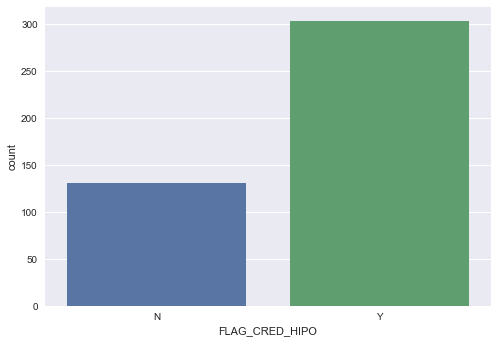

In [16]:
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
graf = sns.countplot(x='FLAG_CRED_HIPO', data=data)

/home/villacorta/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


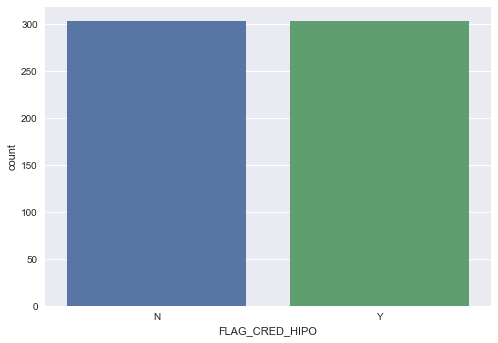

In [17]:
graf = sns.countplot(x='FLAG_CRED_HIPO', data=df_over_sample)

In [18]:
data.columns

Index(['ID', 'SEXO', 'FLAG_CASADO', 'NRO_DEPENDIENTES', 'EDUCACION',
       'FLAG_TRAB_INDEP', 'INGRESOS_SOLICITANTE', 'INGRESOS_COSOLICITANTE',
       'MONTO_PRESTAMO_MILES', 'PLAZO_PRESTAMO_MESES',
       'FLAG_HISTORIAL_CREDITICIO', 'TIPO_ZONA', 'FLAG_CRED_HIPO'],
      dtype='object')